In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Get the training data
dfx = pd.read_csv(r"C:\Users\saksh\OneDrive\Desktop\CodingClub\AI Mafia\linearX.csv")
dfy = pd.read_csv(r"C:\Users\saksh\OneDrive\Desktop\CodingClub\AI Mafia\linearY.csv")

# convert data into linear array
dfx = dfx.values
dfy = dfy.values

x = dfx.reshape((-1,))
y = dfy.reshape((-1,))

print(x.shape)
print(x)

(99,)
[-0.02980118  0.60654168  0.20159622 -0.66614404 -0.20334923  4.36674951
 -0.43474664 -0.60829469 -0.49259599  1.18503519  1.99492611 -0.55044534
  1.12718584  0.49084298 -0.08765053 -1.41818561 -1.01324015 -0.78184275
  1.35858325  0.25944558 -0.37689729 -1.01324015 -1.53388431  0.49084298
  0.78008974 -0.31904794  2.22632352 -0.14549988 -0.37689729  1.58998065
  1.24288455 -1.0710895  -0.20334923  3.26761184 -0.02980118 -0.78184275
 -0.78184275 -0.60829469  0.14374687 -0.37689729  1.06933649 -1.12893885
 -0.60829469 -1.53388431  1.5321313  -0.26119859  0.49084298  0.66439103
 -0.8396921  -0.49259599 -0.02980118 -0.14549988 -0.08765053 -0.60829469
 -0.60829469 -0.26119859  0.60654168  0.54869233 -0.08765053 -0.8396921
  2.22632352 -0.89754145 -0.55044534  0.43299363 -0.31904794 -0.20334923
 -1.1867882   1.47428195 -0.8396921   0.08589752 -0.08765053 -0.55044534
 -1.41818561 -0.9553908  -0.31904794  1.01148714 -0.60829469  1.4164326
 -0.55044534 -1.0710895  -0.89754145 -0.2033492

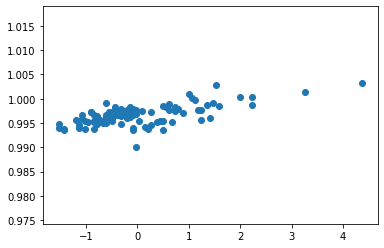

In [17]:
#plot the x and y values
plt.scatter(x,y)
plt.show()

#normalize x
X = (x-x.mean())/x.std()
Y = y


Gradient Decent
1.Start with the random theta.
2.Repeat until coverage.
  Update theta according to rule.

In [18]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [19]:
def error(X,Y,theta):
    error = 0
    for i in range(X.shape[0]):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
    return error

In [20]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i], theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx -Y[i])*X[i]
        
    return grad
        

In [21]:
def gradientDescent(X,Y,learning_rate = 0.001):
    
    #Start with random theta
    theta = np.array([-2.0, 0.0])
    
    max_iteration = 100
    itr = 0
    
    theta_list = []
    error_list = []
    while(itr <= max_iteration):
        grad = gradient(X,Y,theta)
        err = error(X,Y,theta)
        error_list.append(err)
        theta_list.append(theta)
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
        
        itr += 1
        
    return theta, error_list, theta_list

In [22]:
final_theta, error_list, theta_list = gradientDescent(x,y)

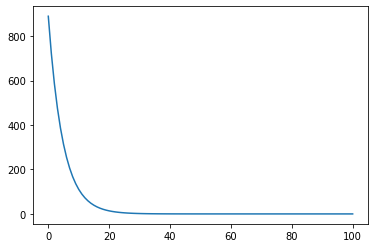

In [23]:
plt.plot(error_list)
plt.show()

In [24]:
print(final_theta)

[0.996554  0.0013579]


In [25]:
### Plot the line for testing data

xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


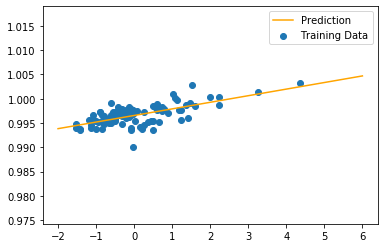

In [26]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()